In [1]:
# Kernel Python (Pyodide)
#import and patch libraries for web use
import pyodide_http
pyodide_http.patch_all

# packages with micropip
import micropip
await micropip.install("openpyxl")

#import pandas
import pandas as pd
#matplotlib library for plotting (I)
import matplotlib.pyplot as plt
#the statsmodels libraty for statistical modeling (II)
import statsmodels.api as sm

# file with data
excel_file = pd.ExcelFile("donations.xlsx", engine='openpyxl')
#another example
#excel_file = pd.ExcelFile("AdvertiseUs.xlsx", engine='openpyxl')
donations = pd.read_excel(excel_file)

#print the DataFrame to display the data
print(donations)


Matplotlib is building the font cache; this may take a moment.


   Shares  Donations
0      50    1429.22
1     100    1420.04
2     150    1993.62
3     200    2772.26
4     250    3060.26
5     300    2606.81
6     350    3585.02
7     400    3645.59
8     450    4069.03
9     500    4623.17


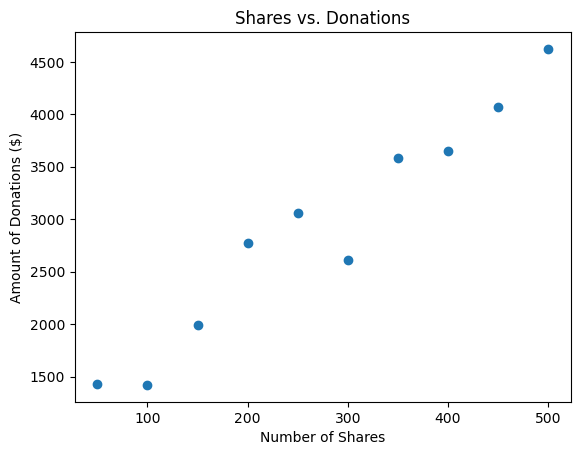

In [2]:
# (I) Data Visualization

# A scatter plot with Shares on the x-axis ans Donations on the y-axis
plt.scatter(donations['Shares'], donations['Donations'])

# Label the x-axis as "Number of Shares
plt.xlabel('Number of Shares')

# Label the y-axis as "Amount of Donations ($)"
plt.ylabel('Amount of Donations ($)')

# Set the title of the plot to 'Shares vs. Donations'
plt.title('Shares vs. Donations')

# Display the plot
plt.show()

In [3]:
# (II) The Simple Linear Regression Model

#define the response (Y) and explanatory (X) variables
x = donations['Shares']
y = donations['Donations']
#another example
#x = donations['Advertising_Expenses']
#y = donations['Weekly_Sales_Revenue']
#add a constant to the explanatory variable
x = sm.add_constant(x)

#build the linear regression model
model = sm.OLS(y, x).fit()

#print the coefficients of the model and R-squared output
print(model.summary())

/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


                            OLS Regression Results                            
Dep. Variable:              Donations   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     127.5
Date:                Thu, 23 Oct 2025   Prob (F-statistic):           3.40e-06
Time:                        15:33:49   Log-Likelihood:                -69.439
No. Observations:                  10   AIC:                             142.9
Df Residuals:                       8   BIC:                             143.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1002.7300    191.606      5.233      0.0

**R-squared = 94.1%<br/>**
94.1%  of the variability in the donation amounts is explaines by the number of social mesia shares a campaign receives. This suggests that social media shares are a strong predictor of donation amounts.<br/>
The simple linear regression model is y = 1002.73 + 6.97x
const - intercept for the model b_0
Shares - the slope value fro the model b_1

In [5]:
donations.head() #prints the first five rows from the dataframe
# obtain the residual from the model
# residual - difference between the observed value and the predicted value
residual = model.resid

# print the residual
print(residual)

0     77.804182
1   -280.061636
2    -55.167455
3    374.786727
4    314.100909
5   -488.034909
6    141.489273
7   -146.626545
8    -71.872364
9    133.581818
dtype: float64


The positive residual indicates that the actual donations received were $77.80 higher than what the model predicted, based on the number of social media shares. This means that for the first campaign, the model slightly underestimated the amount of donations that would be received, given the number of social media shares.<br/>
<br/>
**Residual vs. Fitted Values Plots** <br/>
+ Residuals from a linear relationship. The residuals are randomly scattered around the horizontal axis (zero line), indicating that the simple linear regression model is a good fit for the data.
+ Residuals from a non-linear relationship. The residuals form a clear pattern, suggesting that the linear model is not capturing the true relationship between the variables. In the non-linear data plot, the curved pattern of the residuals indicates that the relationship between the predictor and response variables is not linear.
+ Residuals from data with costant variance (**homoscedasticity**). The residuals are randomly scattered around the horizontal axis (zero line) with a consistent spread, indicating that the model's residuals are evenly distributed.
+ Residuals from data with changing variance (**heteroscedasticity**). The residuals form a funnel shape, where the spread of the residuals increases with the fitted values, indicating that the model's residuals are not consistent.<br/>
<br/>
**Normal Q-Q Plot (Quantile-Quantile Plot)** <br/>
+ Normally distributed residuals - the points closely follow the straight line, indicating that the residuals are normally distributed.
+ Non-normally distributed residuals - the points devuate significantly from the straight line, indicating that the residual are not normally distributed.